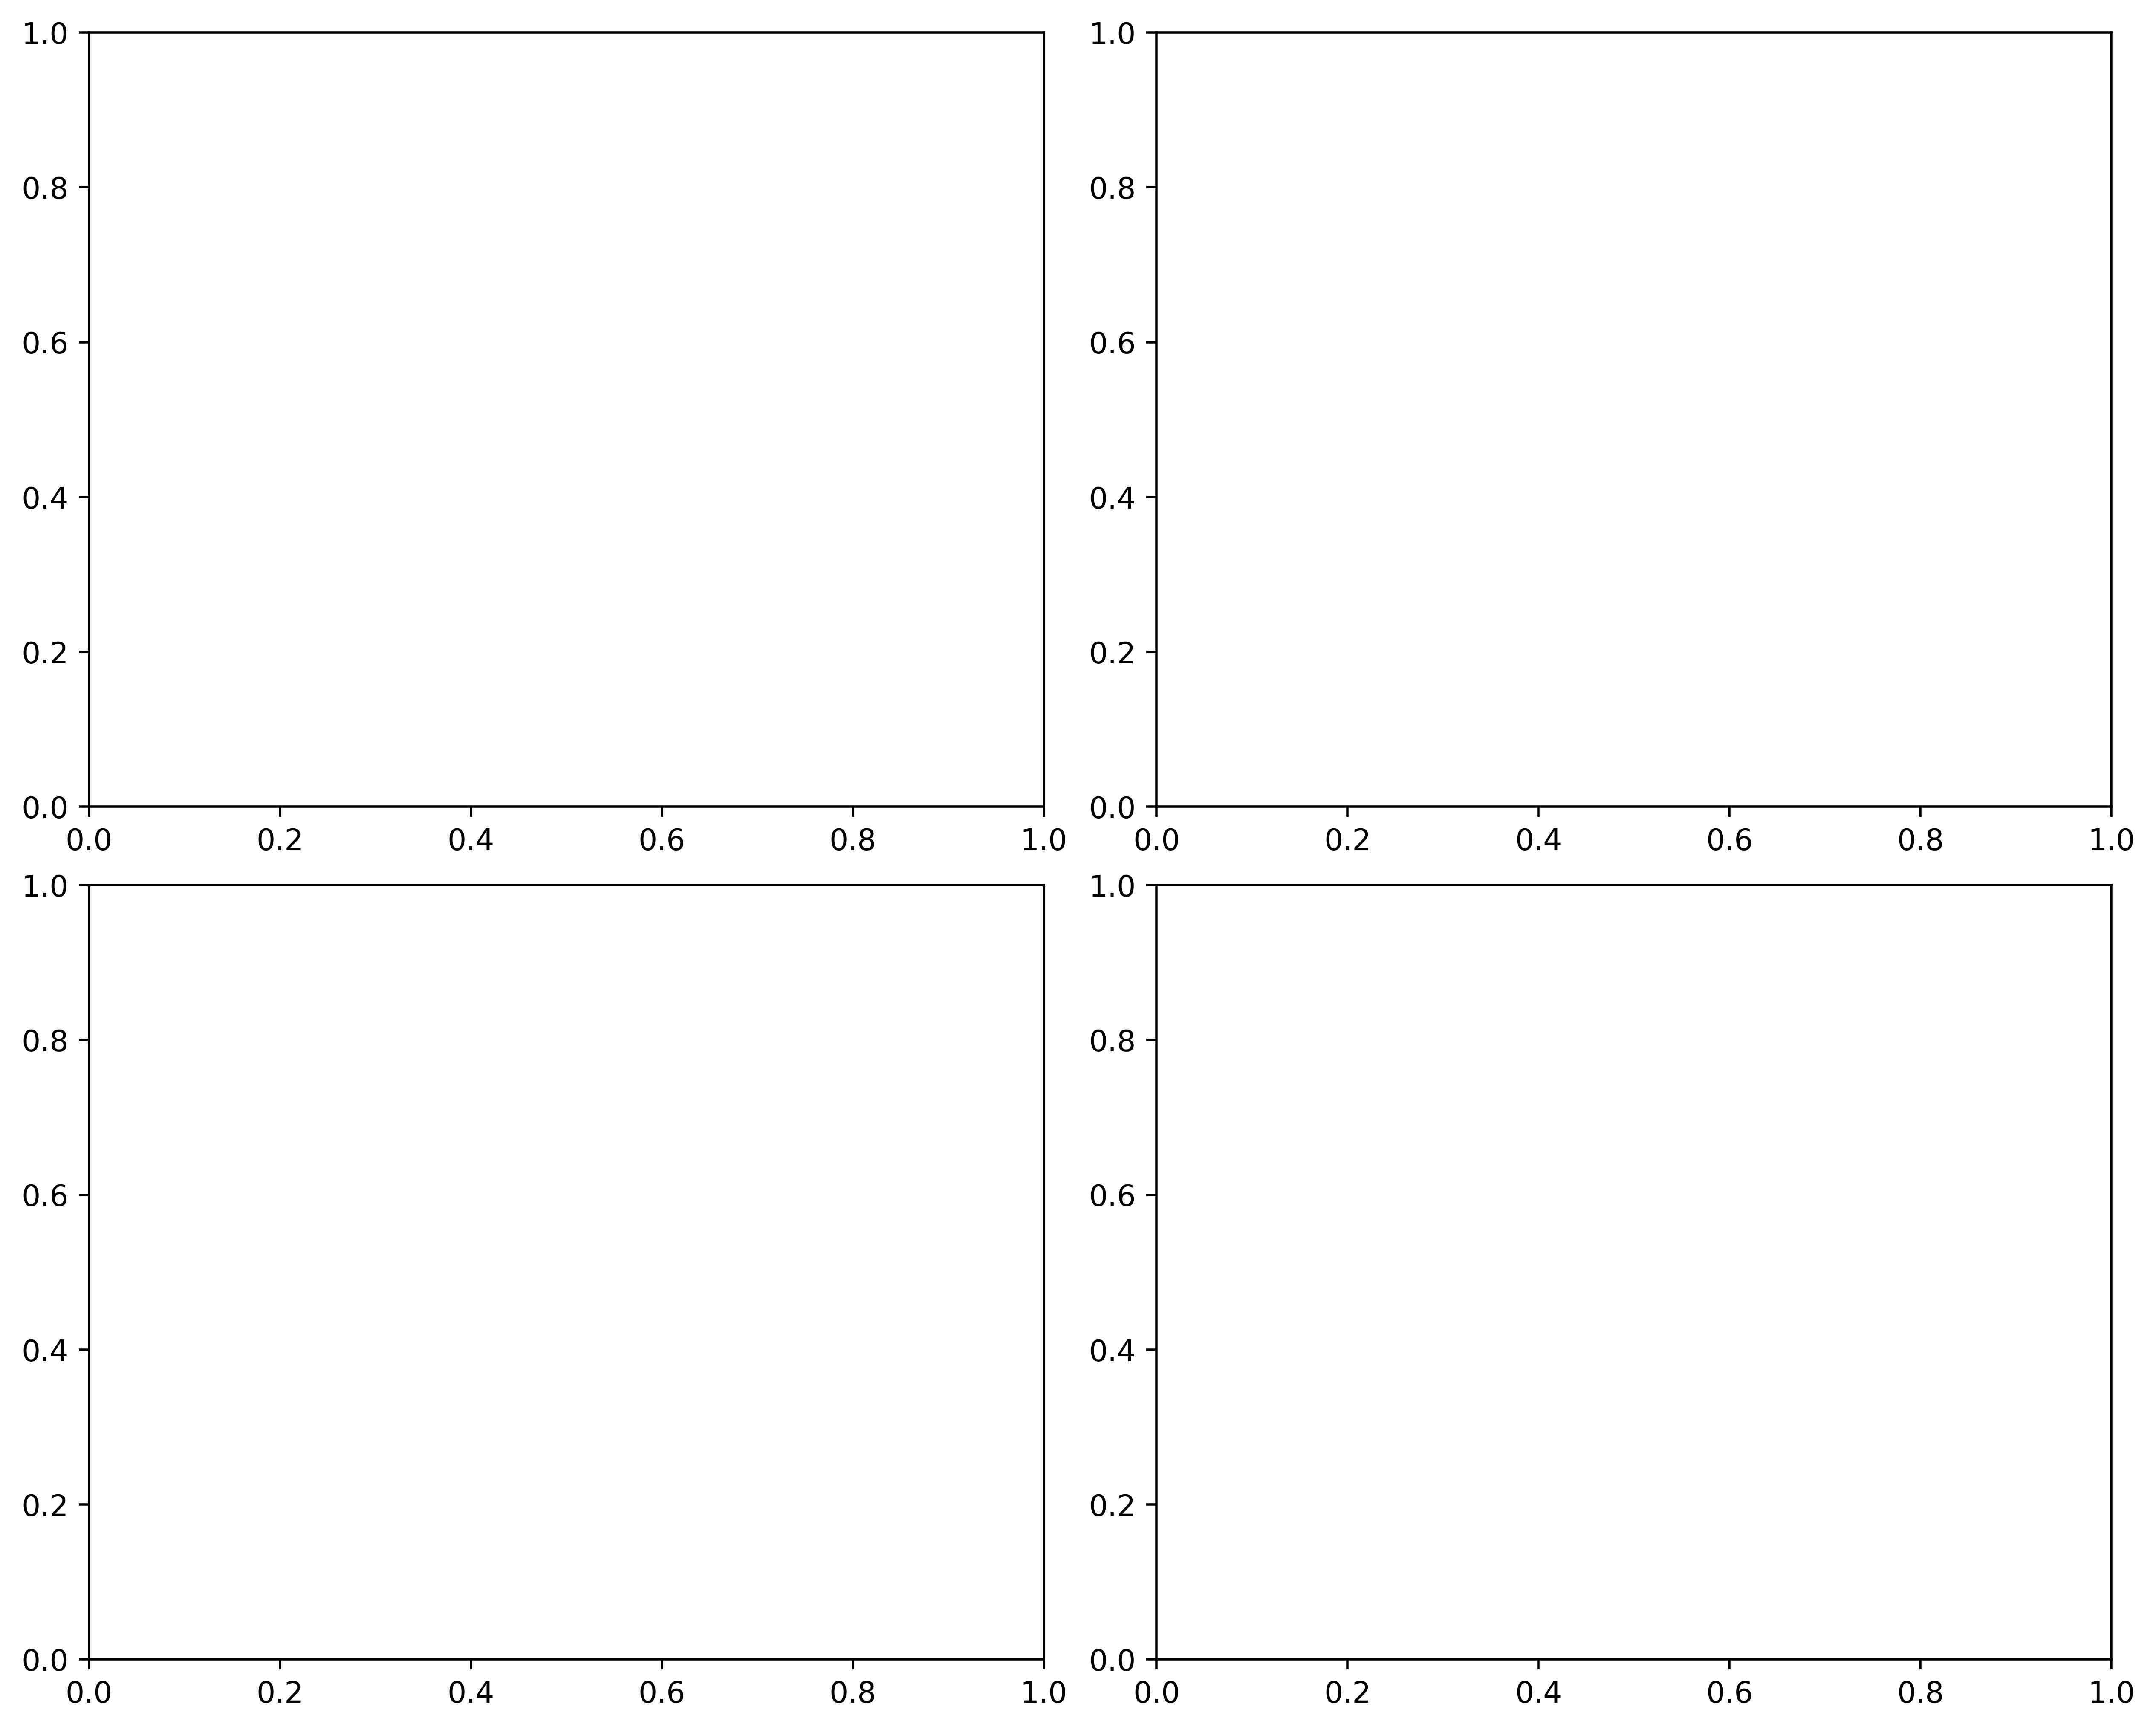

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import PolyCollection
from matplotlib.lines import Line2D
import os
import matplotlib.ticker as ticker

fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=500, constrained_layout=True)
main = '/Users/saschastocker/Documents/Stanford/work2024/FIMH2025/PaperResults'



In [ ]:


# -----------------------------------------------------------------------------
# A) Data Setup
# -----------------------------------------------------------------------------

ax = axes[0, 0]


runs = ['AVG', 'AVGMD', 'AVGMDE1', 'AVGMDFA', 'all']
run_titles = {
    'AVG': 'DWI_avg',
    'AVGMD': 'DWI_avg & MD',
    'AVGMDE1': 'DWI_avg & MD & E1',
    'AVGMDFA': 'DWI_avg & MD & FA',
    'all': 'DWI_avg & MD & E1 & FA'
}

all_data = []
for run in runs:
    csv_file_path = os.path.join(
        main,
        f'HannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx'
    )

    df = pd.read_excel(csv_file_path)
    df = df[['Case ID', 'GT_Median_MD', 'Pred_median_MD']]
    df['Dataset'] = run_titles[run]

    df_melted = pd.melt(
        df,
        id_vars=['Case ID', 'Dataset'],
        value_vars=['GT_Median_MD', 'Pred_median_MD'],
        var_name='Type',
        value_name='Median'
    )
    df_melted['Type'] = df_melted['Type'].replace({
        'GT_Median_MD': 'GT',
        'Pred_median_MD': 'Pred'
    })

    all_data.append(df_melted)

combined_df = pd.concat(all_data, ignore_index=True)

# -----------------------------------------------------------------------------
# B) Setup Figure with Subplots
# -----------------------------------------------------------------------------

# -----------------------------------------------------------------------------
# C) Define Colors & Labels
# -----------------------------------------------------------------------------
dataset_order = [
    'DWI_avg',
    'DWI_avg & MD',
    'DWI_avg & MD & E1',
    'DWI_avg & MD & FA',
    'DWI_avg & MD & E1 & FA'
]

formatted_labels = {
    'DWI_avg': r'DWI$_{avg}$',
    'DWI_avg & MD': r'DWI$_{avg}$' + '\n& MD',
    'DWI_avg & MD & E1': r'DWI$_{avg}$' + '\n& MD & E1',
    'DWI_avg & MD & FA': r'DWI$_{avg}$' + '\n& MD & FA',
    'DWI_avg & MD & E1 & FA': r'DWI$_{avg}$' + '\n& MD & E1 & FA'
}

pred_colors = {
    'DWI_avg': 'lightblue',
    'DWI_avg & MD': 'lightgreen',
    'DWI_avg & MD & E1': 'lightcoral',
    'DWI_avg & MD & FA': 'lightgoldenrodyellow',
    'DWI_avg & MD & E1 & FA': 'lightpink'
}

base_palette = {'GT': 'grey', 'Pred': 'grey'}

# -----------------------------------------------------------------------------
# D) Create the Split Violin Plot in Subplot
# -----------------------------------------------------------------------------
violin = sns.violinplot(
    x='Dataset',
    y='Median',
    hue='Type',
    data=combined_df,
    order=dataset_order,
    hue_order=['GT', 'Pred'],
    split=True,
    inner='quartile',
    palette=base_palette,
    cut=0,
    scale='width',
    width=0.8,
    linewidth=4,
    ax=ax  # Assigning subplot axis
)

# -----------------------------------------------------------------------------
# E) Re-Color the Left (GT) & Right (Pred) Sides
# -----------------------------------------------------------------------------
all_polys = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
for i, ds_key in enumerate(dataset_order):
    left_patch = all_polys[2*i]       # GT side
    right_patch = all_polys[2*i + 1]  # Pred side

    left_patch.set_facecolor('grey')
    left_patch.set_alpha(0.6)
    left_patch.set_edgecolor('black')

    right_patch.set_facecolor(pred_colors[ds_key])
    right_patch.set_alpha(0.6)
    right_patch.set_edgecolor('black')

# -----------------------------------------------------------------------------
# F) Overlay Data Points & Connection Lines
# -----------------------------------------------------------------------------
for idx, ds_label in enumerate(dataset_order):
    df_dataset = combined_df[combined_df['Dataset'] == ds_label]
    
    # GT
    data_gt = df_dataset[df_dataset['Type'] == 'GT']['Median'].values
    x_gt = np.full(len(data_gt), idx - 0.15) + np.random.uniform(-0.02, 0.02, len(data_gt))
    ax.scatter(x_gt, data_gt, color='black', s=50, alpha=1, zorder=10)
    
    # Pred
    data_pred = df_dataset[df_dataset['Type'] == 'Pred']['Median'].values
    x_pred = np.full(len(data_pred), idx + 0.15) + np.random.uniform(-0.02, 0.02, len(data_pred))
    ax.scatter(x_pred, data_pred, color='black', s=50, alpha=1, zorder=10)
    
    # Lines connecting GT & Pred for each case
    for xg, xp, yg, yp in zip(x_gt, x_pred, data_gt, data_pred):
        ax.plot([xg, xp], [yg, yp], color='black', alpha=0.5, zorder=9, linewidth=5)

# -----------------------------------------------------------------------------
# G) Final Formatting
# -----------------------------------------------------------------------------

# Title
ax.set_xticklabels(
    [formatted_labels[label] for label in dataset_order],
    fontsize=8
)
ax.set_ylabel('[$μm^2$/ms]', fontsize=10)
ax.set_xlabel('')
ax.tick_params(axis='y', labelsize=10)
ax.set_xlim(-0.5, 4.5)

# Legend
#legend_elements = [
#    Line2D([0], [0], color='grey', lw=6, label='GT'),
#]
#ax.legend(legend_elements, ['GT'], fontsize=25)
ax.legend([], [], frameon=False)  # Remove legend
ax.title.set_text('MD')




/var/folders/9r/mlgf66555t98p7ptk_n0g21r0000gn/T/ipykernel_52399/2379350943.py:80: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  violin = sns.violinplot(
/var/folders/9r/mlgf66555t98p7ptk_n0g21r0000gn/T/ipykernel_52399/2379350943.py:138: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


AttributeError: 'Axes' object has no attribute 'remove_legend'

In [ ]:
ax = axes[1,0]  # Assign the correct subplot

all_data = []
for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/FIMH2025/PaperResults'
    csv_file_path = os.path.join(
        main,
        f'HannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx'
    )

    df = pd.read_excel(csv_file_path)
    df = df[['Case ID', 'GT_Median_FA', 'Pred_median_FA']]
    df['Dataset'] = run_titles[run]

    df_melted = pd.melt(
        df,
        id_vars=['Case ID', 'Dataset'],
        value_vars=['GT_Median_FA', 'Pred_median_FA'],
        var_name='Type',
        value_name='Median'
    )
    df_melted['Type'] = df_melted['Type'].replace({
        'GT_Median_FA': 'GT',
        'Pred_median_FA': 'Pred'
    })

    all_data.append(df_melted)

combined_df = pd.concat(all_data, ignore_index=True)

# -----------------------------------------------------------------------------
# D) Create the Split Violin Plot inside the subplot
# -----------------------------------------------------------------------------
sns.violinplot(
    x='Dataset',
    y='Median',
    hue='Type',
    data=combined_df,
    order=dataset_order,
    hue_order=['GT', 'Pred'],
    split=True,
    inner='quartile',
    palette=base_palette,
    cut=0,
    scale='width',
    width=0.8,
    linewidth=4,
    zorder=3,
    ax=ax  # <<< Place the plot inside the subplot
)

# -----------------------------------------------------------------------------
# E) Re-Color the Left (GT) & Right (Pred) Sides
# -----------------------------------------------------------------------------
all_polys = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
for i, ds_key in enumerate(dataset_order):
    left_patch = all_polys[2*i]       # GT side
    right_patch = all_polys[2*i + 1]  # Pred side

    left_patch.set_facecolor('grey')
    left_patch.set_alpha(0.6)
    left_patch.set_edgecolor('black')

    right_patch.set_facecolor(pred_colors[ds_key])
    right_patch.set_alpha(0.6)
    right_patch.set_edgecolor('black')

# -----------------------------------------------------------------------------
# F) Overlay Data Points & Connection Lines
# -----------------------------------------------------------------------------
for idx, ds_label in enumerate(dataset_order):
    df_dataset = combined_df[combined_df['Dataset'] == ds_label]
    
    # GT
    data_gt = df_dataset[df_dataset['Type'] == 'GT']['Median'].values
    x_gt = np.full(len(data_gt), idx - 0.15) + np.random.uniform(-0.02, 0.02, len(data_gt))
    ax.scatter(x_gt, data_gt, color='black', s=50, alpha=1, zorder=10)  # <<< ax instead of plt
    
    # Pred
    data_pred = df_dataset[df_dataset['Type'] == 'Pred']['Median'].values
    x_pred = np.full(len(data_pred), idx + 0.15) + np.random.uniform(-0.02, 0.02, len(data_pred))
    ax.scatter(x_pred, data_pred, color='black', s=50, alpha=1, zorder=10)  # <<< ax instead of plt
    
    # Lines connecting GT & Pred for each case
    for xg, xp, yg, yp in zip(x_gt, x_pred, data_gt, data_pred):
        ax.plot([xg, xp], [yg, yp], color='black', alpha=0.5, zorder=9, linewidth=5)  # <<< ax instead of plt

# -----------------------------------------------------------------------------
# G) Final Formatting
# -----------------------------------------------------------------------------
ax.set_xticklabels(
    [formatted_labels[label] for label in dataset_order],
    fontsize=8
)
ax.set_ylabel('[unitless]', fontsize=10)
ax.set_xlabel('')
ax.set_ylim(0.14, 0.29) 
ax.set_xlim(-0.5,4.5)
ax.tick_params(axis='y', labelsize=10)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.remove_legend()
ax.title.set_text('FA')

# Remove legend (use a global one)

In [ ]:
#!/usr/bin/env python3

from matplotlib.collections import PolyCollection  # For grabbing the violin polygons

# Use axes[0,1] for this plot
ax = axes[0,1]

# Define runs and corresponding dataset names
runs = ['AVG', 'AVGMD', 'AVGMDE1', 'AVGMDFA', 'all']
run_titles = {
    'AVG': 'DWI_avg',
    'AVGMD': 'DWI_avg & MD',
    'AVGMDE1': 'DWI_avg & MD & E1',
    'AVGMDFA': 'DWI_avg & MD & FA',
    'all': 'DWI_avg & MD & E1 & FA'
}

# Path to the Excel data
main_dir = '/Users/saschastocker/Documents/Stanford/work2024/FIMH2025/PaperResults'

# Load data from each Excel file
all_data = []
for run in runs:
    excel_file_path = os.path.join(
        main_dir,
        f"HannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx"
    )
    
    df = pd.read_excel(excel_file_path, dtype={'Slice Number': str})
    
    # Zero-pad slice numbers and map names
    df['Slice Number'] = df['Slice Number'].str.zfill(3)
    slice_name_mapping = {'001': 'Apex', '002': 'Mid', '003': 'Base'}
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)
    df['Slice Name'].fillna('Unknown', inplace=True)
    
    # Create separate L2, L3 entries
    df_label2 = df.copy()
    df_label3 = df.copy()
    
    df_label2['HD'] = df_label2['Hausdorff Distance Label 2']
    df_label2['Label Type'] = 'L2'
    df_label2['Dataset'] = run_titles[run]

    df_label3['HD'] = df_label3['Hausdorff Distance Label 3']
    df_label3['Label Type'] = 'L3'
    df_label3['Dataset'] = run_titles[run]

    all_data.extend([df_label2, df_label3])

# Combine all data
combined_df = pd.concat(all_data, ignore_index=True)

# Identify inliers/outliers
threshold = 100
combined_df['Value Type'] = combined_df['HD'].apply(
    lambda x: 'Outlier' if x > threshold else 'Inlier'
)

# Count extreme failures (HD > 1000)
failure_threshold = 1000
failure_counts = (
    combined_df[combined_df['HD'] > failure_threshold]
    .groupby(['Dataset', 'Label Type'])
    .size()
)
failure_counts_dict = failure_counts.to_dict()

# Plotting parameters
marker_mapping = {'Apex': '.', 'Mid': '.', 'Base': '.'}
slice_color_mapping = {'Apex': 'blue', 'Mid': 'green', 'Base': 'orange'}

# Desired dataset colors for the violin fill

# Create the subplot grid



# Compute the max HD among inliers for y-label placement
max_hd_inliers = combined_df[combined_df['Value Type'] == 'Inlier']['HD'].max()
# Ensure y_text_offset fits within the plot's ylim
y_text_offset = min(max_hd_inliers + 1, ax.get_ylim()[1])  # Stay within axis limits

# Clear any existing collections
ax.clear()

# Draw the violin plot
sns_violin = sns.violinplot(
    x='Dataset',
    y='HD',
    hue='Label Type',
    data=combined_df[combined_df['Value Type'] == 'Inlier'], 
    split=True,
    palette="pastel",
    cut=0,
    gap=0.2,
    inner='quartile',
    width=1,
    linewidth=4,
    order=run_titles.values(),
    hue_order=['L2', 'L3'],
    ax=ax
)
ax.set_xlabel("")

# Get PolyCollections and ensure we only process the expected number
poly_collection = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
datasets_ordered = list(run_titles.values())
expected_polygons = len(datasets_ordered) * 2  # 2 per dataset (L2 and L3)

print(f"Expected polygons: {expected_polygons}, Found: {len(poly_collection)}")

for i, poly in enumerate(poly_collection[:expected_polygons]):
    dataset_index = i // 2
    dataset_name = datasets_ordered[dataset_index]
    color = pred_colors[dataset_name]
    poly.set_facecolor(color)
    poly.set_edgecolor("black")
    poly.set_alpha(0.8)

# Scatter for apex, mid, base (within the subplot)
for idx, dataset_name in enumerate(run_titles.values()):
    for label_type, offset in zip(['L2', 'L3'], [-0.15, 0.15]):
        df_subset = combined_df[
            (combined_df['Dataset'] == dataset_name) & 
            (combined_df['Label Type'] == label_type)
        ]
        for slice_name in ['Apex', 'Mid', 'Base']:
            df_slice = df_subset[df_subset['Slice Name'] == slice_name]
            if not df_slice.empty:
                ax.scatter(
                    [idx + offset] * len(df_slice),
                    df_slice['HD'],
                    marker=marker_mapping[slice_name],
                    color='black',
                    edgecolor='k',
                    s=200,
                    alpha=0.8,
                    zorder=5,  # Ensure it's above the violins
                )


# Updated failure count plotting - ensure no duplicates and stay within axes
seen_counts = set()  # Track unique (dataset, label_type) combinations to prevent duplicates
for idx, dataset_name in enumerate(run_titles.values()):
    for label_type, offset in zip(['L2', 'L3'], [-0.15, 0.15]):
        key = (dataset_name, label_type)
        if key in seen_counts:
            continue  # Skip if we've already plotted this combination
        count = failure_counts_dict.get(key, 0)
        if count > 0:
            # Use transform to ensure text stays within axes
            ax.text(
                idx + offset,
                y_text_offset,
                s=str(count),
                ha='center',
                va='bottom',  # Anchor at bottom to prevent overflow
                fontsize=20,
                color='red',
                fontweight='bold',
                transform=ax.get_xaxis_transform(),  # Use axis transform for proper scaling
                clip_on=True  # Clip text to axes boundaries
            )
        seen_counts.add(key)

# Overlay scatter for outliers [remains unchanged...]
ax.set_xticks(range(len(dataset_order)))
ax.set_xticklabels(
    [formatted_labels[label] for label in dataset_order],
    fontsize=8
)
ax.set_ylabel("[mm]", fontsize=10)
ax.set_ylim(0, 10)
ax.set_xlim(-0.5, 4.5)
ax.tick_params(axis='y', labelsize=10)
ax.legend([], [], frameon=False)
ax.title.set_text('HD inferior & superior IP')


  # Restore labels


In [ ]:
# Use axes[1,1] for this plot
ax = axes[1,1]  

# Define runs and corresponding dataset names

# Path to the Excel data
main_dir = '/Users/saschastocker/Documents/Stanford/work2024/FIMH2025/PaperResults'

# Load data from each Excel file
all_data = []
for run in runs:
    excel_file_path = os.path.join(
        main_dir,
        f"HannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx"
    )
    
    df = pd.read_excel(excel_file_path, dtype={'Slice Number': str})
    
    # Zero-pad slice numbers and map names
    df['Slice Number'] = df['Slice Number'].str.zfill(3)
    slice_name_mapping = {'001': 'Apex', '002': 'Mid', '003': 'Base'}
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)
    df['Slice Name'].fillna('Unknown', inplace=True)
    
    # Create separate Epi / Endo entries
    df_epi = df.copy()
    df_endo = df.copy()
    
    # Pull values from the new columns
    df_epi['HD'] = df_epi['Avg. HD Epi']
    df_epi['Label Type'] = 'Epi'
    df_epi['Dataset'] = run_titles[run]

    df_endo['HD'] = df_endo['Avg. HD Endo']
    df_endo['Label Type'] = 'Endo'
    df_endo['Dataset'] = run_titles[run]

    all_data.extend([df_epi, df_endo])

# Combine all data
combined_df = pd.concat(all_data, ignore_index=True)

# Identify inliers/outliers (same threshold as before—adjust if desired)
threshold = 100
combined_df['Value Type'] = combined_df['HD'].apply(
    lambda x: 'Outlier' if x > threshold else 'Inlier'
)

# Count extreme failures (HD > 1000), if relevant
failure_threshold = 1000
failure_counts = (
    combined_df[combined_df['HD'] > failure_threshold]
    .groupby(['Dataset', 'Label Type'])
    .size()
)
failure_counts_dict = failure_counts.to_dict()

# Plotting parameters
marker_mapping = {'Apex': '.', 'Mid': '.', 'Base': '.'}
slice_color_mapping = {'Apex': 'blue', 'Mid': 'green', 'Base': 'orange'}


# Compute the max HD among inliers for y‐label placement
max_hd_inliers = combined_df[combined_df['Value Type'] == 'Inlier']['HD'].max()
y_text_offset = max_hd_inliers + 1

# Clear the existing plot in the subplot (if any)
ax.clear()

# === 1) Draw the violin plot within the correct subplot ===
sns.violinplot(
    x='Dataset',
    y='HD',
    hue='Label Type', 
    data=combined_df[combined_df['Value Type'] == 'Inlier'], 
    split=True,
    palette="pastel",  # Placeholder colors (we'll change them next)
    cut=0,
    inner='quartile',
    width=0.8,
    gap=0.2,
    order=run_titles.values(),
    hue_order=['Epi', 'Endo'],
    linewidth=4,
    ax=ax  # <<<< Ensure we plot on the correct subplot
)

ax.set_xlabel("")

# === 2) Post‐hoc color correction: each dataset => single color for both halves ===
poly_collection = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
datasets_ordered = list(run_titles.values())

for i, poly in enumerate(poly_collection):
    dataset_index = i // 2  # 2 polygons (Epi, Endo) per dataset
    dataset_name = datasets_ordered[dataset_index]
    color = pred_colors[dataset_name]
    poly.set_facecolor(color)
    poly.set_edgecolor("black")  
    poly.set_alpha(0.8)        

# === 3) Scatter plot for Apex, Mid, Base markers ===
for idx, dataset_name in enumerate(run_titles.values()):
    for label_type, offset in zip(['Epi', 'Endo'], [-0.15, 0.15]):
        df_subset = combined_df[
            (combined_df['Dataset'] == dataset_name) & 
            (combined_df['Label Type'] == label_type)
        ]
        for slice_name in ['Apex', 'Mid', 'Base']:
            df_slice = df_subset[df_subset['Slice Name'] == slice_name]
            if not df_slice.empty:
                ax.scatter(
                    [idx + offset] * len(df_slice),
                    df_slice['HD'],
                    marker=marker_mapping[slice_name],
                    color='black',
                    edgecolor='k',
                    s=200,
                    alpha=0.8,
                    zorder=5,
                )

# === 4) Failure count text above violins ===
for idx, dataset_name in enumerate(run_titles.values()):
    for label_type, offset in zip(['Epi', 'Endo'], [-0.15, 0.15]):
        count = failure_counts_dict.get((dataset_name, label_type), 0)
        if count > 0:
            ax.text(
                idx + offset,
                y_text_offset,
                s=str(count),
                ha='center',
                fontsize=12,
                color='red',
                fontweight='bold'
            )

# === 5) Overlay scatter for outliers ===
outliers = combined_df[combined_df['Value Type'] == 'Outlier']
for label_type, offset in zip(['Epi', 'Endo'], [-0.15, 0.15]):
    df_outliers = outliers[outliers['Label Type'] == label_type]
    ax.scatter(
        df_outliers['Dataset'].map({k: i for i, k in enumerate(run_titles.values())}) + offset,
        df_outliers['HD'],
        color='red',
        edgecolor='k',
        s=50,
        alpha=0.8,
        zorder=6
    )

# === 6) Final Formatting ===
ax.set_xticks(range(len(dataset_order)))
ax.set_xticklabels(
    [formatted_labels[label] for label in dataset_order],
    fontsize=8
)
ax.set_ylabel("[mm]", fontsize=12)
ax.set_ylim(0, 0.5)  # Adjust y-limit dynamically
ax.set_xlim(-0.5, 4.5)
ax.tick_params(axis='y', labelsize=10)
ax.legend([], [], frameon=False)  # Remove legend
ax.title.set_text('AHD endo and epi')

# Ensure spacing between subplots is correct

In [ ]:
fig